# Group information

Names:

*   Gabriel Cunha Marchetti
*   Felipe Scalabrin Dosso

RAs:
*   251055
*   236110

# **Machine Learning MC886/MO444 - Task \#2**: Model Selection for classification


### Objective:

To explore **Model Selection** techniques to select the best model and hyperparameters for a classification task.

#### **Dataset: Online Shoppers Purchasing Intention**

The dataset contains sessions of access to a website. Each user can have only one record for each year, in the case were the users were repeated.

Our classification objective is to determine when a given session will end with the user purchasing something.
This information is present in the "Revenue" column, which is our target.

Features and the corresponding descriptions:

- **Administrative**: Amount of times the user visited this type of page.
- **Administrative_Duration**: Time spent by the user visiting this type of page.
- **Informational**:  Amount of times the user visited this type of page.
- **Informational_Duration**: Time spent by the user visiting this type of page.
- **ProductRelated**:  Amount of times the user visited this type of page.
- **ProductRelated_Duration**: Time spent by the user visiting this type of page.
- **BounceRates**: The bounce rate is the percentage of visitors who enter the site from that page and then leave without triggering any other analytics action. This field contains the average bounce rate of the pages visited.
- **ExitRates**: The Exit rate is the percentage of visitors that exited the site on a specific page. This field contains the average bounce rate of the pages visited.
- **PageValues**: The page value is calculated by google analytics based on the values spent after visiting this page. This field contains the average page values of the pages visited.
- **SpecialDay**: The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- **Month**: Month of the visit.
- **OperatingSystems**: The operating system used by the visitor. This field is coded as integer categories.
- **Browser**: The browser used by the visitor. This field is coded as integer categories.
- **Region**: The region where the user visited the site. This field is coded as integer categories.
- **TrafficType**: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct). This field is coded as integer categories.
- **VisitorType**: Visitor type as "New Visitor", "Returning Visitor", and "Other"
- **Weekend**: Boolean value indicating whether the date of the visit is a weekend day.
- **Revenue**: The target value, indicating where the visitor bought something (1) or did not bought anything (0).


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

This is the same folder as in the previous task, you can check your google drive to be sure if you need to copy it again.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [ ]:
# link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "online_shoppers_intention_mod.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)

Mounted at /content/gdrive


In [ ]:
# Testing if dataset was loaded
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


### **Data analysis and preprocessing** (1.5 points)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Revenue`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think can help in understanding the dataset.

As in the previous task, preprocess the data, transform the categorical features with OneHotEncoding, and remember to scale continuous features to be in a similar scale between each other.


In [ ]:
# Modules imported
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

Without any pre-processing we can initially see that metrics such as 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
'BounceRates', 'ExitRates' and 'PageValues' don't need a wide preprocessing since they are
already discretized, i.e., are numerical features and they have somekind of ordinality between then! So we will assume that these variable will be usefull for our model.

In [ ]:
# Saving the X and y values from the dataframe.
y = df['Revenue']
X = df.drop(['Revenue'], axis=1)

In [ ]:
# Spliting the Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 42 )

## Exploring the Dataset features

#### Month Feature

First we can explore if the month of access is related to Revenue.

In [ ]:
months = np.unique(np.array(X_train['Month']))
months

array(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'], dtype=object)

In [ ]:
# Making a Bar-Plot such that we can visualize if the month has some correlation
# with Revenue.
correct_order_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sorted_months = sorted(months, key = lambda x : correct_order_months.index(x))

solds_each_month = np.zeros(len(sorted_months))
notSolds_each_month = np.zeros(len(sorted_months))

X_train_aux = np.array(X_train['Month'])
y_train_aux = np.array(y_train)
for i in range(len(X_train_aux)):
  index = sorted_months.index( X_train_aux[i] )
  if( y_train_aux[i] == 0 ):
    notSolds_each_month[index] += 1
  else:
    solds_each_month[index] += 1

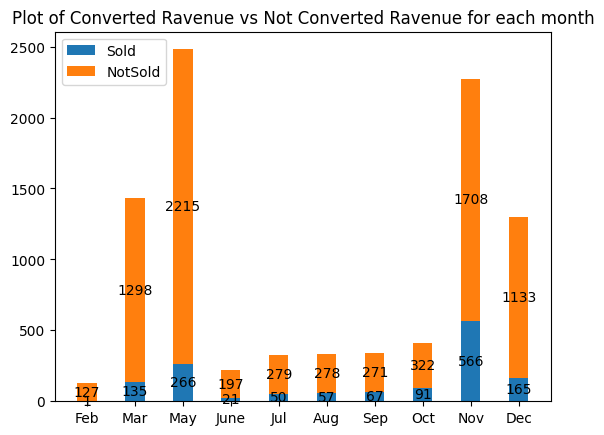

In [ ]:
sales = {
    'Sold' : solds_each_month,
    'NotSold' : notSolds_each_month,
}
width = 0.4

fig, axes = plt.subplots()
bottom = np.zeros(len(sorted_months))

for typeSale, numSales in sales.items():
  p = axes.bar(sorted_months, numSales, width, label=typeSale, bottom = bottom)
  bottom += numSales

  axes.bar_label(p, label_type = 'center')

axes.set_title('Plot of Converted Ravenue vs Not Converted Ravenue for each ' +
               'month')
axes.legend()
plt.show()


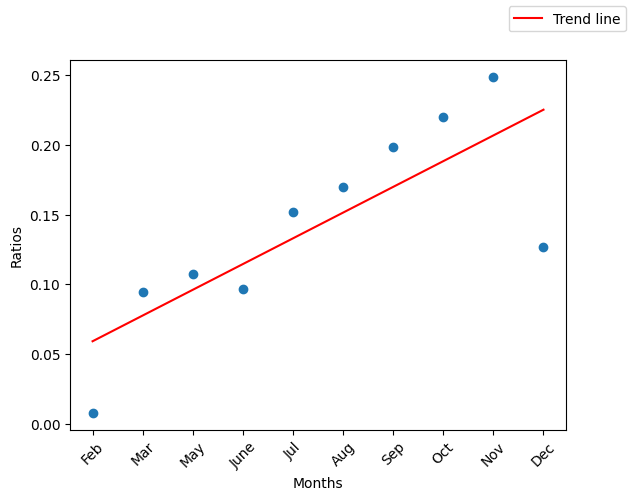

In [ ]:
# Difficult to see with only a Bar-Plot.
fig, axes = plt.subplots()

ratio_acceptance_month = np.zeros(len(sorted_months))
accepted_sales = sales['Sold']
notAccepted_sales = sales['NotSold']
for i in range(len(ratio_acceptance_month)):
  ratio_acceptance_month[i] = accepted_sales[i] / ( accepted_sales[i] + notAccepted_sales[i] )

ticks = np.arange(len(ratio_acceptance_month))

axes.scatter(ticks, ratio_acceptance_month)

axes.set_xlabel('Months')
axes.set_ylabel('Ratios')

axes.set_xticks(ticks)
axes.set_xticklabels(sorted_months, rotation=45)

slope, intercept = np.polyfit(ticks, ratio_acceptance_month, 1)
axes.plot(ticks, slope * ticks + intercept, color='red', label='Trend line')

fig.legend()
fig.show()



We can see with the Trend Line that there is clearly a relation between
converted Revenue and the month

In [ ]:
# As we can see there is seems to be a relation between Month vs Revenue. So
# i will use a OneHotEncoding to add to the final dataset since there is no
# hierarquy between each label of month.
one_hot_encoder_month = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_monthTransform = one_hot_encoder_month.fit_transform(X[['Month']])
X = pd.concat( [X, one_hot_encoder_monthTransform], axis = 1 ).drop(columns=['Month'])


#### Weakend Feature

In [ ]:
unique_weekend = np.unique(np.array(X_train['Weekend']))
unique_weekend

array([False,  True])

In [ ]:
sold_weekend = np.zeros(len(unique_weekend))
notSold_weekend = np.zeros(len(unique_weekend))
X_train_aux = np.array(X_train['Weekend'])
y_train_aux = np.array(y_train)
for i in range(len(X_train_aux)):
  if( y_train_aux[i] == 0 ):
    if( X_train_aux[i] == False ):
      notSold_weekend[0] += 1
    else:
      notSold_weekend[1] += 1
  else:
    if( X_train_aux[i] == False ):
      sold_weekend[0] += 1
    else:
      sold_weekend[1] += 1

print(sold_weekend)
print(notSold_weekend)


[1058.  361.]
[6073. 1755.]


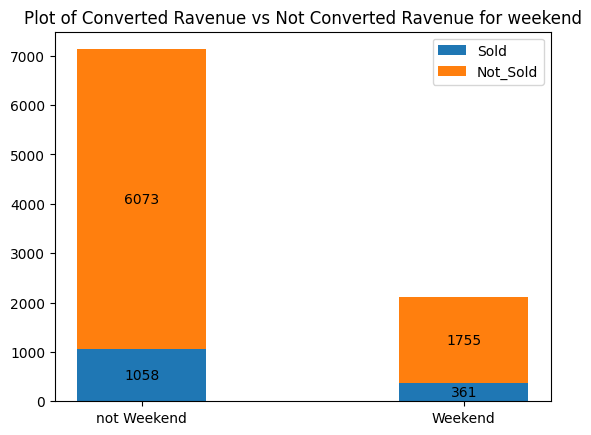

In [ ]:
weekend_sold = {
    'Sold' : sold_weekend,
    'Not_Sold' : notSold_weekend,
}
width = 0.4

fig, axes = plt.subplots()
bottom = np.zeros(len(unique_weekend))

for typeSale, numSales in weekend_sold.items():
  p = axes.bar(unique_weekend, numSales, width, label=typeSale, bottom = bottom)
  bottom += numSales

  axes.bar_label(p, label_type = 'center')

axes.set_title('Plot of Converted Ravenue vs Not Converted Ravenue for weekend')
axes.set_xticks(np.array([0.0, 1.0]))
axes.set_xticklabels(['not Weekend', 'Weekend'])
axes.legend()
plt.show()

In [ ]:
# Here we cannot make a tendency line since there is only two data points
# So we can use the logistical regression to make use of the Bayes Theorem.
X_weekend = X_train['Weekend'].copy(deep=True)
X_weekend = np.array(X_weekend).reshape(-1, 1)

y_response = np.array(y_train.copy(deep=True))

model = LogisticRegression()
model.fit(X_weekend, y_response)

print("Coefficient", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

Coefficient 0.16539023380696347
Intercept: -1.7472888364577446


As we can see the sign of the coefficient is positive, so we can say that there
is a relation between weekend and sales, such that if we have weekend feature
at value one, then we would see a increase in likeliness of buying something

In [ ]:
# So i will add it to the final matrix with a binary value
X['Weekend'] = X['Weekend'].astype(int)

In [ ]:
X_train['Weekend']

10385    False
8823     False
5298     False
10187     True
11018    False
         ...  
11964    False
5191      True
5390     False
860      False
7270      True
Name: Weekend, Length: 9247, dtype: bool

### Visitor Type

In [ ]:
unique_visitorType = np.unique(np.array(X_train['VisitorType']))
unique_visitorType

array(['New_Visitor', 'Other', 'Returning_Visitor'], dtype=object)

In [ ]:
# This column is a bit confusing, because what does Other define
# Since there in no other option between new_visitor ou returning_visitor.
# We can simply explore this data by seeing the likely acceptness of each
# category
accepted = np.zeros(3)
total = np.zeros(3)

# 0-index : new_visitor
# 1-index : other
# 2-index : returning_visitor

X_train_aux = np.array(X_train['VisitorType'])
y_train_aux = np.array(y_train)

for i in range(len(X_train_aux)):
  if( X_train_aux[i] == 'New_Visitor' ):
    total[0] += 1
    if( y_train_aux[i] == 1 ):
      accepted[0] +=1
  elif( X_train_aux[i] == 'Other' ):
    total[1] += 1
    if( y_train_aux[i] == 1 ):
      accepted[1] +=1
  else:
    total[2] += 1
    if( y_train_aux[i] == 1 ):
      accepted[2] +=1

#print(accepted)
#print(total)
ratios = np.zeros(3)

for i in range(3):
  ratios[i] = accepted[i] / total[i]

print(ratios)

[0.24862313 0.15151515 0.13817952]


We can see that there is somekind of relation between visitor type and converted
revenue. Because the likeliness of a new visitor buy is almost the double of
returning visitors.

In [ ]:
# Since there is no ordinal values between them, we can make a onehotencoding.
one_hot_encoder_visitorType = OneHotEncoder(handle_unknown='ignore',
                                            sparse_output=False).set_output(transform='pandas')
one_hot_encoder_visitorTypeTransform = one_hot_encoder_visitorType.fit_transform(X[['VisitorType']])
X = pd.concat( [ X, one_hot_encoder_visitorTypeTransform ], axis = 1 ).drop(columns=['VisitorType'])

In [ ]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
10385,7,154.000000,3,248.166667,34,886.479167,0.000000,0.005128,77.801588,0.0,Dec,2,2,1,2,New_Visitor,False
8823,0,0.000000,0,0.000000,4,53.625000,0.000000,0.050000,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,False
5298,0,0.000000,0,0.000000,2,121.000000,0.000000,0.050000,0.000000,0.0,May,3,2,1,3,Returning_Visitor,False
10187,0,0.000000,2,21.000000,17,190.708333,0.022222,0.039259,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
11018,0,0.000000,0,0.000000,11,146.500000,0.018182,0.018182,0.000000,0.0,Nov,1,1,1,2,New_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14,1005.608333,0,0.000000,25,732.344872,0.000000,0.015676,0.000000,0.0,Nov,3,2,1,2,Returning_Visitor,False
5191,0,0.000000,0,0.000000,14,340.000000,0.000000,0.015385,23.388000,0.0,May,2,2,3,1,Returning_Visitor,True
5390,0,0.000000,0,0.000000,3,189.000000,0.000000,0.066667,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
860,0,0.000000,0,0.000000,13,305.000000,0.000000,0.016667,0.000000,0.0,Mar,1,1,1,2,New_Visitor,False


### Region

In [ ]:
unique_region = np.unique(np.array(X_train['Region']))
unique_region

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
region_converted_sales = np.zeros(len(unique_region))
region_total_sales = np.zeros(len(unique_region))

X_aux = np.array(X_train['Region'])
y_aux = np.array(y_train)
for datapoint in range(len(X_aux)):
  region_total_sales[X_aux[datapoint] - 1] += 1
  if( y_aux[datapoint] == 1 ):
    region_converted_sales[X_aux[datapoint] - 1] += 1

print(region_converted_sales)
print(region_total_sales)


[575. 144. 255. 125.  40.  89.  86.  43.  62.]
[3578.  857. 1802.  875.  249.  587.  547.  359.  393.]


In [ ]:
ratios = np.zeros(len(unique_region))
for i in range(len(unique_region)):
  ratios[i] = region_converted_sales[i] / region_total_sales[i]

print(ratios)

[0.1607043  0.168028   0.14150943 0.14285714 0.16064257 0.1516184
 0.15722121 0.11977716 0.15776081]


In [ ]:
# As we can see the order of the variance is three orders of magnitude smaller
# than the mean.
print(np.mean(ratios))
print(np.var(ratios))

0.15112433712118845
0.00018811152251924752


As we can see above, there seems to be not much relation between the
region and sales, even though it seems it could relevant to know the region of the user. This is the reason that we are going to drop out the
region column from the original dataset.

In [ ]:
X.drop(columns=['Region'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Browser

In [ ]:
unique_browser = np.unique(np.array(X_train['Browser']))
unique_browser

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
each_browser_accepted_sales = np.zeros(len(unique_browser))
each_browser_total_sales = np.zeros(len(unique_browser))

X_aux = np.array(X_train['Browser'])
y_aux = np.array(y_train)

for i in range(len(X_aux)):
  each_browser_total_sales[X_aux[i] - 1] += 1
  if( y[i] == 1 ):
    each_browser_accepted_sales[X_aux[i] - 1] += 1

print(each_browser_total_sales)
print(each_browser_accepted_sales)


[1.839e+03 5.973e+03 7.400e+01 5.680e+02 3.600e+02 1.310e+02 2.700e+01
 9.600e+01 1.000e+00 1.160e+02 5.000e+00 1.000e+01 4.700e+01]
[251. 841.  15.  86.  43.  15.   4.  16.   0.  16.   0.   1.   4.]


In [ ]:
ratios = np.zeros(len(unique_browser))

for i in range(len(ratios)):
  ratios[i] = each_browser_accepted_sales[i] / each_browser_total_sales[i]

print(ratios)

[0.13648722 0.14080027 0.2027027  0.15140845 0.11944444 0.11450382
 0.14814815 0.16666667 0.         0.13793103 0.         0.1
 0.08510638]


In [ ]:
print(np.mean(ratios))
print(np.var(ratios))

0.11563070277766048
0.0032324789818174984


Here we have the same discussion about each browser. We can't really tell if a type of Browser is most likely to buy something from the internet. So here we are going to exclude the Browser from the analysis

In [ ]:
X.drop(columns=['Browser'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Operating System

In [ ]:
unique_OS = np.unique(np.array(X_train['OperatingSystems']))
unique_OS

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
OS_accepted_sales = np.zeros(len(unique_OS))
OS_total_sales = np.zeros(len(unique_OS))

X_aux = np.array(X_train['OperatingSystems'])
y_aux = np.array(y_train)

for i in range(len(X_aux)):
  OS_total_sales[ X_aux[i] - 1 ] += 1
  if( y[i] == 1 ):
    OS_accepted_sales[ X_aux[i] - 1 ] += 1

print(OS_accepted_sales)
print(OS_total_sales)


[270. 713. 260.  42.   0.   1.   0.   6.]
[1.923e+03 5.001e+03 1.891e+03 3.530e+02 5.000e+00 8.000e+00 5.000e+00
 6.100e+01]


In [ ]:
ratios = np.zeros(len(unique_OS))

for i in range(len(ratios)):
  ratios[i] = OS_accepted_sales[i] / OS_total_sales[i]

print(ratios)

[0.14040562 0.14257149 0.13749339 0.11898017 0.         0.125
 0.         0.09836066]


Here we can see that there are some outliers, there are some operating systems that don't even have sales. So for the sake of the analysis we are going to drop the Operating Systems column.

In [ ]:
X.drop(columns=['OperatingSystems'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Spliting the Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 42 )

## **Metric selection** (0.5 point)

As we're working with unbalanced data, the accuracy metric is not a good indicator of performance. Choose a metric and explain why that metric is a good fit for the online shopping intention problem. You don't need to implement the metric, only discuss it.

*Tip: Some common metrics are [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)*.

Choosing the "right" metric depends on the type of classification that you want to be more costly, so when minimizing we can minize this kind of feature. Here, we are trying to predict if a new or returning user is more likely to buy something from the site. Notice in that sense that both False-Positives and False-Negatives are malefical for this task, since we could spend resources such as advertising funneling in user's that will not buy, instead of someone that could actually buy it. For this reason we will not select the balanced accuracy, because it is more concerned in the disparity between True-Negatives and True-Positives. In the same way the recall and precision are more concerned with False-Negatives and False-Positives, respectively.

So, we need to choose between the f1-score and the AUC. Since the f1-score is more straight forward and the AUC score lacks interpretability and we will want to test a lot of things in the next sections we will use the f1-score.

## **Feature selection** (2 points)

As seen in class, there are different ways to select which features to use in a machine learning model.

You should implement the "Forward stepwise selection" technique to find the best `p` features to be used in this task according to that method.

Use the [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and the **K-fold cross-validation** as optimality criterion. You can use the Scikit-learn library, which has helper functions to create the [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) logic and the model. The metric used in K-fold should be the one chosen in the previous section!

Remember to save a new dataframe only with the selected features for the next steps! Also, use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data on the final part of the whole task.

In [ ]:
def forward_setpwise_selection(X, y):
  num_features = X.shape[1] # Get the number of columns in X matrix.
  remaining_features = set(range(num_features)) #Not used features at current iteration
  selected_features = []
  kfold = KFold(n_splits=5)
  model = LogisticRegression(solver='saga', max_iter=1000)
  # Due to not converging response
  scaler = StandardScaler()
  score_each_layer = []

  for train_indexes, test_indexes in kfold.split(X):
    X_train, X_test = X[train_indexes], X[test_indexes]
    y_train, y_test = y[train_indexes], y[test_indexes]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    while remaining_features:
      scores = []
      for feature in remaining_features:
        feature_subset_selection = selected_features + [feature]
        # Using the columns of selected features
        X_selected_train = X_train_scaled[:, feature_subset_selection]
        X_selected_test = X_test_scaled[:, feature_subset_selection]

        model.fit(X_selected_train, y_train)
        y_predicted = model.predict(X_selected_test)
        f1 = f1_score(y_test, y_predicted)
        scores.append([f1, feature])

      # Select the best f1 score and its feature
      best_f1_score, best_feature = max(scores, key=lambda x: x[0])
      # will retrieve the best_f1_score and the best_feature added to this
      # layer
      score_each_layer.append( [best_f1_score, best_feature] )

      selected_features.append(best_feature)
      remaining_features.remove(best_feature)

  return score_each_layer


In [ ]:
score_each_layer = forward_setpwise_selection(np.array(X_train), np.array(y_train))
score_each_layer

[[0.4810126582278481, 8],
 [0.4987405541561712, 25],
 [0.5050000000000001, 14],
 [0.5088161209068011, 16],
 [0.5088161209068011, 6],
 [0.5135802469135802, 22],
 [0.5223880597014925, 20],
 [0.5223880597014925, 13],
 [0.5223880597014925, 17],
 [0.5223880597014925, 15],
 [0.5247524752475248, 11],
 [0.5247524752475248, 19],
 [0.5247524752475248, 26],
 [0.5247524752475248, 27],
 [0.5221674876847291, 12],
 [0.5283950617283951, 3],
 [0.526829268292683, 2],
 [0.526829268292683, 9],
 [0.5232273838630807, 10],
 [0.515970515970516, 18],
 [0.5123152709359605, 21],
 [0.5123152709359605, 23],
 [0.5123152709359605, 24],
 [0.5073891625615763, 1],
 [0.5061425061425062, 7],
 [0.5181598062953995, 4],
 [0.5145631067961165, 0],
 [0.5012285012285013, 5]]

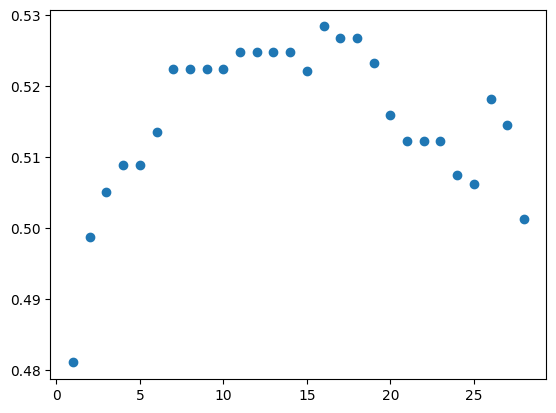

In [ ]:
f1_scores = [ score[0] for score in score_each_layer ]
num_selected_features = np.linspace(1, len(f1_scores), len(f1_scores))

fig, axes = plt.subplots()
axes.scatter(num_selected_features, f1_scores)

In [ ]:
f1_scores = []
for layer in score_each_layer:
  f1_scores.append(layer[0])

max_f1_score = max(f1_scores)

selected_features = []
for i in range(len(score_each_layer)):
  if( score_each_layer[i][0] >= max_f1_score ):
    selected_features.append( score_each_layer[i][1] )
    break
  selected_features.append( score_each_layer[i][1] )

selected_features

[8, 25, 14, 16, 6, 22, 20, 13, 17, 15, 11, 19, 26, 27, 12, 3]

In [ ]:
X_selected_train = X_train.iloc[:, selected_features]
X_selected_test = X_test.iloc[:, selected_features]

In [ ]:
X_selected_train

,PageValues,VisitorType_New_Visitor,Weekend,Month_Dec,BounceRates,Month_Nov,Month_Mar,TrafficType,Month_Feb,Month_Aug,Browser,Month_June,VisitorType_Other,VisitorType_Returning_Visitor,Region,Informational_Duration
8916,0.000000,0.0,0,0.0,0.004348,1.0,0.0,11,0.0,0.0,8,0.0,0.0,1.0,6,0.00
772,2.086218,0.0,0,0.0,0.002198,0.0,1.0,2,0.0,0.0,2,0.0,0.0,1.0,3,235.55
12250,3.451072,0.0,0,0.0,0.000688,1.0,0.0,2,0.0,0.0,2,0.0,0.0,1.0,2,0.00
7793,36.672294,0.0,0,0.0,0.008333,0.0,0.0,4,0.0,1.0,5,0.0,0.0,1.0,7,0.00
6601,10.150644,0.0,1,0.0,0.006632,0.0,0.0,1,0.0,1.0,2,0.0,0.0,1.0,3,733.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,0.000000,0.0,0,0.0,0.002899,1.0,0.0,2,0.0,0.0,2,0.0,0.0,1.0,3,31.50
10705,0.000000,0.0,0,1.0,0.002874,0.0,0.0,2,0.0,0.0,1,0.0,0.0,1.0,1,61.00
9507,5.539900,0.0,0,0.0,0.006479,1.0,0.0,10,0.0,0.0,1,0.0,0.0,1.0,1,65.00
440,0.000000,0.0,1,0.0,0.000000,0.0,1.0,2,0.0,0.0,2,0.0,0.0,1.0,4,0.00


## **Model selection** (4 points)

This is the main section of the task. Using the features selected in the previous section, you should do a [**Grid search** with K-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to select the best classification model and its hyperparameters for this task. You can do it by hand if you want (you will need to do a nested loop for each tested parameter to have all combinations).

Remember to use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data.

You should train and validate the following models:
- [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

As the Lasso model do not predict classes, you would need to convert the results to classes, and execute a GridSearch by hand. Alternatively, you can use only the Logistic regression model and test the regularization parameters ('l1' for Lasso regularization and 'l2' for Ridge) and show the best hyperparemeters when using each regularization. Remember to change the "C" parameter (the smaller the C, the stronger is the regularization).

Explore the documentation above and select which hyperparameters to vary, besides the regularization ones.

Also, you should test the polynomial transformation to find possible nonlinear relations between the features of the dataset. **Do not** use values above "3" for the `degree` of the polynomial transformation, as the number of features increases exponentially.

In short, you should use GridSearchCV (that uses K-fold internally) to get the best hyperparameters for the model using different regularization parameters, while also testing the polynomial transformation.

*Note: you will need to use the `fit` method more than once to test the different dataset transformations. Choose wisely which hyperparameters to test, as the GridSearch will test all combinations and can take very a long time to finish.*

In [ ]:
param_grid_regularization = { 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

scaler = StandardScaler()
X_selected_train_scaled = scaler.fit_transform(X_selected_train)
X_selected_test_scaled = scaler.fit_transform(X_selected_test)


grid_search_logistic = GridSearchCV(
                                    LogisticRegression(penalty = 'l1', solver='saga' ,random_state = 42, max_iter = 1000),
                                    param_grid_regularization,
                                    cv = 5
                                   )

grid_search_logistic.fit(X_selected_train_scaled, y_train)
best_params_logistic = grid_search_logistic.best_params_
best_score_logistic = grid_search_logistic.best_score_
test_score = grid_search_logistic.score(X_selected_test_scaled, y_test)

print("Best Params: ", best_params_logistic)
print("Best Score: ", best_score_logistic)
print("Test Score: ", test_score)

Best Params:  {'C': 10}
Best Score:  0.8900185052548493
Test Score:  0.8777165098929613


In [ ]:
model_lasso = LogisticRegression(penalty = 'l1', C = 10, solver='saga' ,random_state = 42, max_iter = 1000)
model_lasso.fit(X_selected_train_scaled, y_train)

LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

In [ ]:
param_grid_regularization = { 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

scaler = StandardScaler()
X_selected_train_scaled = scaler.fit_transform(X_selected_train)
X_selected_test_scaled = scaler.fit_transform(X_selected_test)


grid_search_logistic = GridSearchCV(
                                    LogisticRegression(penalty = 'l2', solver='saga' ,random_state = 42, max_iter = 1000),
                                    param_grid_regularization,
                                    cv = 5
                                   )

grid_search_logistic.fit(X_selected_train_scaled, y_train)
best_params_logistic = grid_search_logistic.best_params_
best_score_logistic = grid_search_logistic.best_score_
test_score = grid_search_logistic.score(X_selected_test_scaled, y_test)

print("Best Params: ", best_params_logistic)
print("Best Score: ", best_score_logistic)
print("Test Score: ", test_score)

Best Params:  {'C': 1}
Best Score:  0.8900185052548493
Test Score:  0.8773921505027571


In [ ]:
model_ridge = LogisticRegression(penalty = 'l2', C = 1, solver='saga' ,random_state = 42, max_iter = 1000)
model_ridge.fit(X_selected_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42, solver='saga')

In [ ]:
model = LogisticRegression(penalty = 'none', solver = 'saga', random_state = 42, max_iter = 1000)
model.fit(X_selected_train_scaled, y_train)

test_score = model.score(X_selected_test_scaled, y_test)
print("Test Score: ", test_score)

Test Score:  0.8770677911125527


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
model_without_reg = LogisticRegression(penalty = 'none', solver = 'saga', random_state = 42, max_iter = 1000)
model_without_reg.fit(X_selected_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='none', random_state=42,
                   solver='saga')

### With some polyfit

In [ ]:
poly_2degrees = PolynomialFeatures(degree=2)
X_poly_2degrees_train = poly_2degrees.fit_transform(X_selected_train_scaled)
X_poly_2degrees_test = poly_2degrees.fit_transform(X_selected_test_scaled)

model = LogisticRegression(penalty = 'none', solver = 'saga', random_state = 42, max_iter = 1000)
model.fit(X_poly_2degrees_train, y_train)

test_score = model.score(X_poly_2degrees_test, y_test)
print("Test Score: ", test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Test Score:  0.8799870256243918


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
poly_2degrees = PolynomialFeatures(degree=3)
X_poly_2degrees_train = poly_2degrees.fit_transform(X_selected_train_scaled)
X_poly_2degrees_test = poly_2degrees.fit_transform(X_selected_test_scaled)

model = LogisticRegression(penalty = 'none', solver = 'saga', random_state = 42, max_iter = 1000)
model.fit(X_poly_2degrees_train, y_train)

test_score = model.score(X_poly_2degrees_test, y_test)
print("Test Score: ", test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Test Score:  0.8627959779435614


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Discussion of key points

- What was the best model hyperparemeters, according to cross validation?
- The models that use regularization were able to outperform the Logistic Regression without it? Explain why.


The best model according to the test score is the Lasso method and with C = 1. Here C by it's own don't say much about what we are doing, excepts that we are using regularization. But we can see the Ridge method that C = 10, which says that for similar results the regularization of the Ridge was loose compared to the Lasso method. By the meaning of the Lasso method that it has a regularization with a feature selection imbued and seeing that the Logistic Regression without any regularization could perform as the other two methods, we can see that all selected variables are related to the response variable.

So the methods with Regularization could not perform significantly better because our dataset is good enough for the amount of features that we have, i. e. we have a lot of Data for those features that we used. We can see that adding more non-linearity with the PolynomialFeatures didn't increase that much the performance of the algorithm, so that the score in the case of a polynomial of degree 3 indicates some overfitting.

## Threshold testing (1 point)

The three models trained in the previous session can return the probabilities of a sample being of the positive class.
The default threshold used to convert the results to the desired 0 or 1 output is `0.5`.

Use the K-fold cross validation to test different thresholds with the best models trained in the previous section (remember to train the best models with all train data and the best hyperparameters).

*If the model does not output probabilities, look for the `predic_proba` method*.

In [ ]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
y_prob_lasso = model_lasso.predict_proba(X_selected_test_scaled)
scores = []
for threshold in thresholds:
  correct = 0
  y_pred = ( y_prob_lasso[:, 1] > threshold ).astype(int)
  y_test_aux = np.array(y_test)
  for i in range(len(y_pred)):
    if( y_pred[i] == y_test_aux[i] ):
      correct += 1
  scores.append( correct / len(y_pred) )

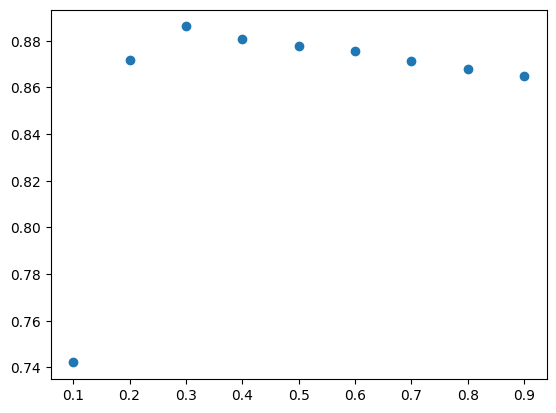

In [ ]:
fig, axes = plt.subplots()
plt.scatter(thresholds, scores)

In [ ]:
y_prob_ridge = model_ridge.predict_proba(X_selected_test_scaled)
scores = []
for threshold in thresholds:
  correct = 0
  y_pred = ( y_prob_ridge[:, 1] > threshold ).astype(int)
  y_test_aux = np.array(y_test)
  for i in range(len(y_pred)):
    if( y_pred[i] == y_test_aux[i] ):
      correct += 1
  scores.append( correct / len(y_pred) )

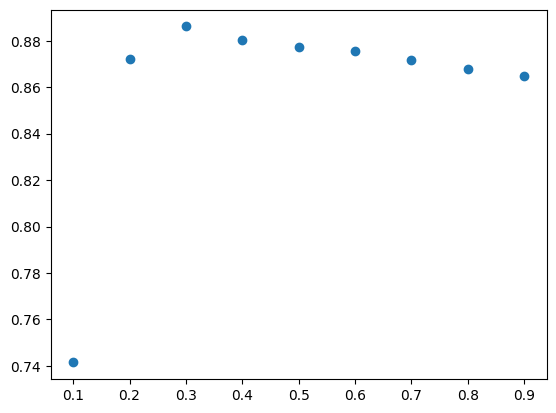

In [ ]:
fig, axes = plt.subplots()
plt.scatter(thresholds, scores)

In [ ]:
y_prob_without = model_without_reg.predict_proba(X_selected_test_scaled)
scores = []
for threshold in thresholds:
  correct = 0
  y_pred = ( y_prob_without[:, 1] > threshold ).astype(int)
  y_test_aux = np.array(y_test)
  for i in range(len(y_pred)):
    if( y_pred[i] == y_test_aux[i] ):
      correct += 1
  scores.append( correct / len(y_pred) )

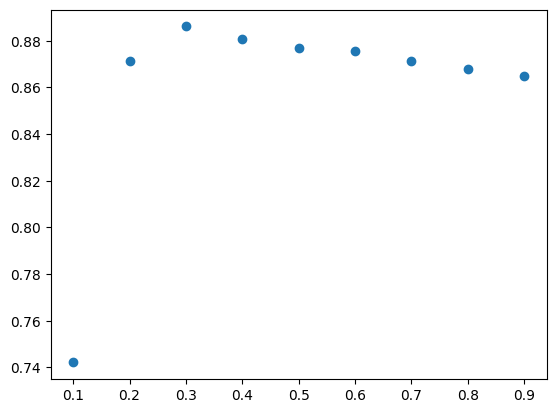

In [ ]:
fig, axes = plt.subplots()
plt.scatter(thresholds, scores)

Here we can see the effects of changing the threshold. We can see that there are some changes in changing this value, so it plays a important role here.

### Visualizing/interpreting weights (0.5 point)

As we're dealing with models that apply regularization terms, it's relatively easy to verify those results on the coefficient weights of the trained models.

Use the function below to visualize the weights of the final models.</br>
Also, train the three models again using *all* original features, and use the function below to compare how the weight distribution behaves on each of the models*.

\* *If no features were removed in previous sections, just compare the models with and without regularization*

In [ ]:
## You don't need to change this cell!
import plotly.express as px

def plot_weights(model, columns):
  '''
  Plot the weights of the model for each column in an interative graph.
  "model" should be an sklearn model or follow the same interface, having the "coef_" attribute with the weights.

  -----
  Examples:
  plot_weights(classifier, X.columns)
  # for polynomial transformations
  plot_weights(classifier, poly.get_feature_names_out(X.columns))

  '''
  if not hasattr(model, 'coef_'):
    print("Invalid model!")
    return

  df_plot = pd.DataFrame(columns=['weight','columns'])
  df_plot['columns']= columns

  if len(columns) == len(model.coef_):
    df_plot['weight']=model.coef_
  else:
    df_plot['weight']=model.coef_[0]

  fig = px.bar(df_plot, x='columns', y='weight', color='weight')
  fig.show()

In [ ]:
# Plot the weights of your models!
plot_weights(model_lasso, X_selected_test.columns)

In [ ]:
plot_weights(model_ridge, X_selected_test.columns)

In [ ]:
plot_weights(model_without_reg, X_selected_test.columns)

#### Discussion of key points

- What conclusions can you have when looking at the different graphs?


We can see that the features of this model are unbalanced between them, such that PageValues and BounceRates have in order of them times the order of influence compared to the other ones. This explains why the Lasso method was the better of them all since it make a second feature selection itself, so that those variables are discarted.

### Testing (0.5 point)

Finally, choose your **Best** model in validation, test it and plot the normalized confusion matrix.

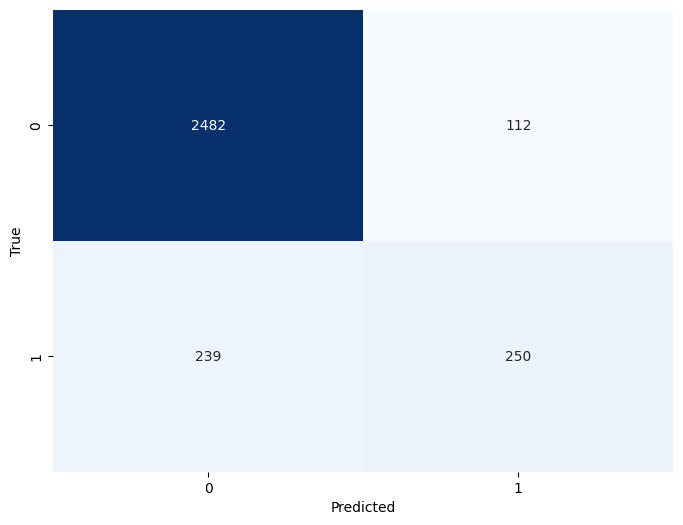

In [ ]:
import seaborn as sns
# using the seaborn, because i used ChatGPT and it's easier to make it.
y_prob_lasso = model_lasso.predict_proba(X_selected_test_scaled)
y_pred = ( y_prob_lasso[:, 1] > 0.3 ).astype(int)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Here we can see that our method could't predict well the people who bought it, this may be due to the threshold selection, let's see it.

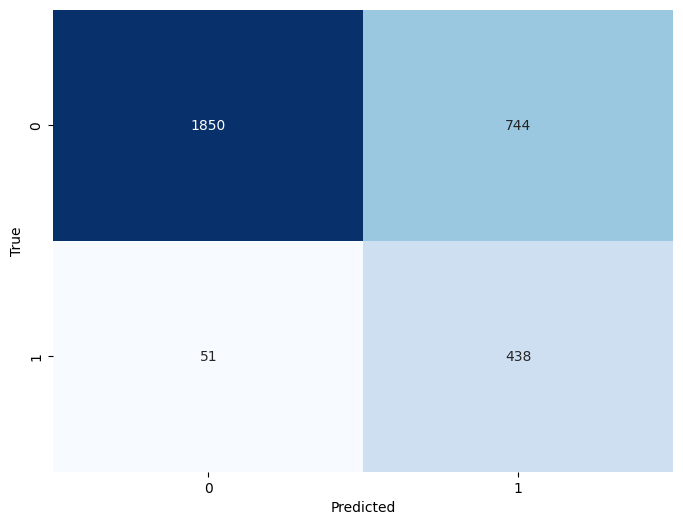

In [ ]:
import seaborn as sns
# using the seaborn, because i used ChatGPT and it's easier to make it.
y_prob_lasso = model_lasso.predict_proba(X_selected_test_scaled)
y_pred = ( y_prob_lasso[:, 1] > 0.1 ).astype(int)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Note that this dataset is sensitive to the threshold selection

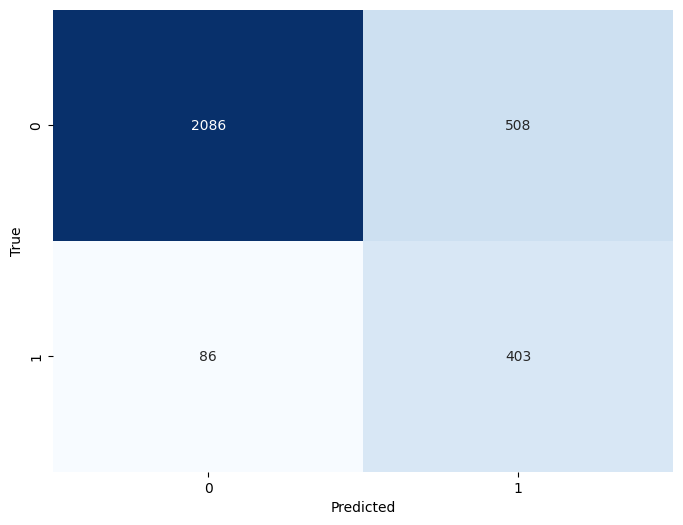

In [ ]:
import seaborn as sns
# using the seaborn, because i used ChatGPT and it's easier to make it.
y_prob_lasso = model_lasso.predict_proba(X_selected_test_scaled)
y_pred = ( y_prob_lasso[:, 1] > 0.15 ).astype(int)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Deadline

Thursday, May 2, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May ~(3)~ 6 11:59 pm : grade * 0.75
- May ~(4)~ 7, 11:59 pm : grade * 0.5
- May ~(5)~ 8, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.